In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import cv2


def damp_coefficient(coeff, sigma):
    
    fft_coeff = np.fft.fft(coeff, axis=0)
    fft_coeff = np.fft.fftshift(fft_coeff, axes=[0])

    ydim, _ = fft_coeff.shape
    gauss1d = 1 - np.exp(-np.arange(-ydim // 2, ydim // 2)**2 / (2 * sigma**2))
    damped_fc = fft_coeff * gauss1d[:, np.newaxis]

    damped_coeff = np.fft.ifftshift(damped_fc, axes=[0])
    damped_coeff = np.fft.ifft(damped_coeff, axis=0)
    return damped_coeff.real


def remove_stripes(image, decomp_level, wavelet, sigma):

    coeffs = pywt.wavedec2(
        image, wavelet=wavelet, level=decomp_level, mode='symmetric')

    damped_coeffs = [coeffs[0]]

    for ii in range(1, len(coeffs)):
        ch, cv, cd = coeffs[ii]

        cv = damp_coefficient(cv, sigma)
        ch = damp_coefficient(ch, sigma)

        damped_coeffs.append((ch, cv, cd))

    rec_image = pywt.waverec2(damped_coeffs, wavelet=wavelet, mode='symmetric')
    return rec_image


In [2]:
input_image = cv2.imread(r'C:\Users\OS\Desktop\Workspace\1r.png', cv2.IMREAD_GRAYSCALE)

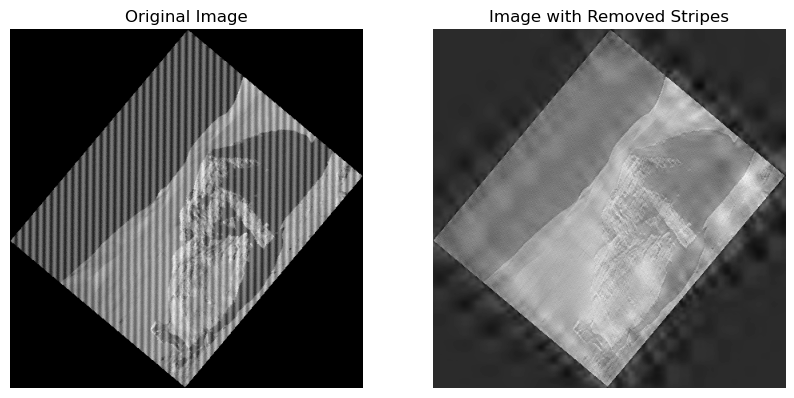

In [3]:

decomp_level = 5  # Decomposition level
wavelet = 'db4'   # Wavelet type
sigma = 20        # Sigma value for Gaussian filter

# Remove stripes from the image
output_image = remove_stripes(input_image, decomp_level, wavelet, sigma)

# Display the original and processed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Image with Removed Stripes')
plt.axis('off')

plt.show()


In [4]:
cv2.imwrite('2.png',output_image)

True

In [6]:
ori = cv2.imread(r'C:\Users\OS\Desktop\Workspace\python code\CPV301\2\2.png')
ted = cv2.imread(r'C:\Users\OS\Desktop\Workspace\hapt\3\png')
ori = cv2.resize(ori,(200,200))
ted = cv2.resize(ted,(200,200))

result = cv2.hconcat([ori,ted])
cv2.imshow('',result)
cv2.waitKey(0)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
